In [23]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import RandomizedSearchCV

In [5]:
heart_df = pd.read_csv("heart.csv")
heart_df

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [6]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   gender    1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
X = heart_df.drop("target", axis=1)


In [8]:
X.columns = ["yaş", 
             "cinsiyet", 
             "göğüs ağrısı", 
             "kan basıncı", 
             "kolesterol", 
             "kan şekeri", 
             "ekg", 
             "kalp atış hızı", 
             "anjina", 
             "kalp krizi", 
             "ST segmenti", 
             "ana damar sayısı", 
             "talyum sintigrafisi"]

In [9]:
heart_df.nunique()

age          41
gender        2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [10]:
X["cinsiyet"].value_counts()

cinsiyet
1    713
0    312
Name: count, dtype: int64

In [11]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
yaş,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
cinsiyet,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
göğüs ağrısı,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
kan basıncı,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
kolesterol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
kan şekeri,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
ekg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
kalp atış hızı,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
anjina,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
kalp krizi,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


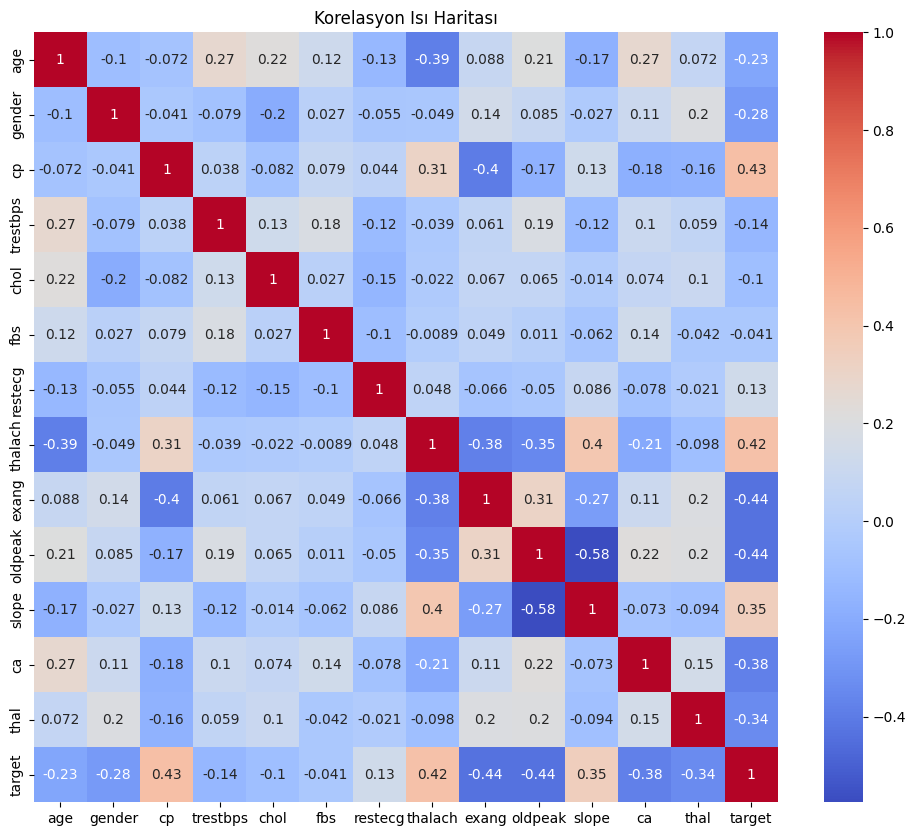

In [12]:
# Pearson korelasyon matrisini oluşturun
corr = heart_df.corr()

# Korelasyon matrisinin ısı haritasını gösterin
plt.figure(figsize=(12, 10))
plt.title("Korelasyon Isı Haritası")
sbn.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

In [13]:
y = heart_df["target"].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.15, 
                                                    random_state=42)

In [15]:
dt = DecisionTreeClassifier()


In [16]:
param_dist = {"max_depth": [3, 5],
"max_features": range(1, len(X.columns)),
"min_samples_leaf": range(1, 7),
"criterion": ["gini"]}
dt_random = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=42)
dt_random.fit(X_train, y_train)
dt = DecisionTreeClassifier(**dt_random.best_params_)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features=9)

In [17]:
y_pred = dt.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test, y_pred)

In [19]:
print("Doğruluk: %{:.2f}".format(accuracy * 100))

Doğruluk: %84.42


In [20]:
confusion_matrix(y_test, y_pred, labels=[0,1])

array([[60, 18],
       [ 6, 70]])

In [21]:
feature_names = X.columns
feature_importance = pd.DataFrame(dt.feature_importances_, index = feature_names).sort_values(0, ascending = False)
feature_importance

,0
göğüs ağrısı,0.344685
talyum sintigrafisi,0.156233
ana damar sayısı,0.141119
kalp krizi,0.089653
yaş,0.076263
kalp atış hızı,0.060104
kolesterol,0.039358
cinsiyet,0.037379
anjina,0.022320
kan basıncı,0.017910


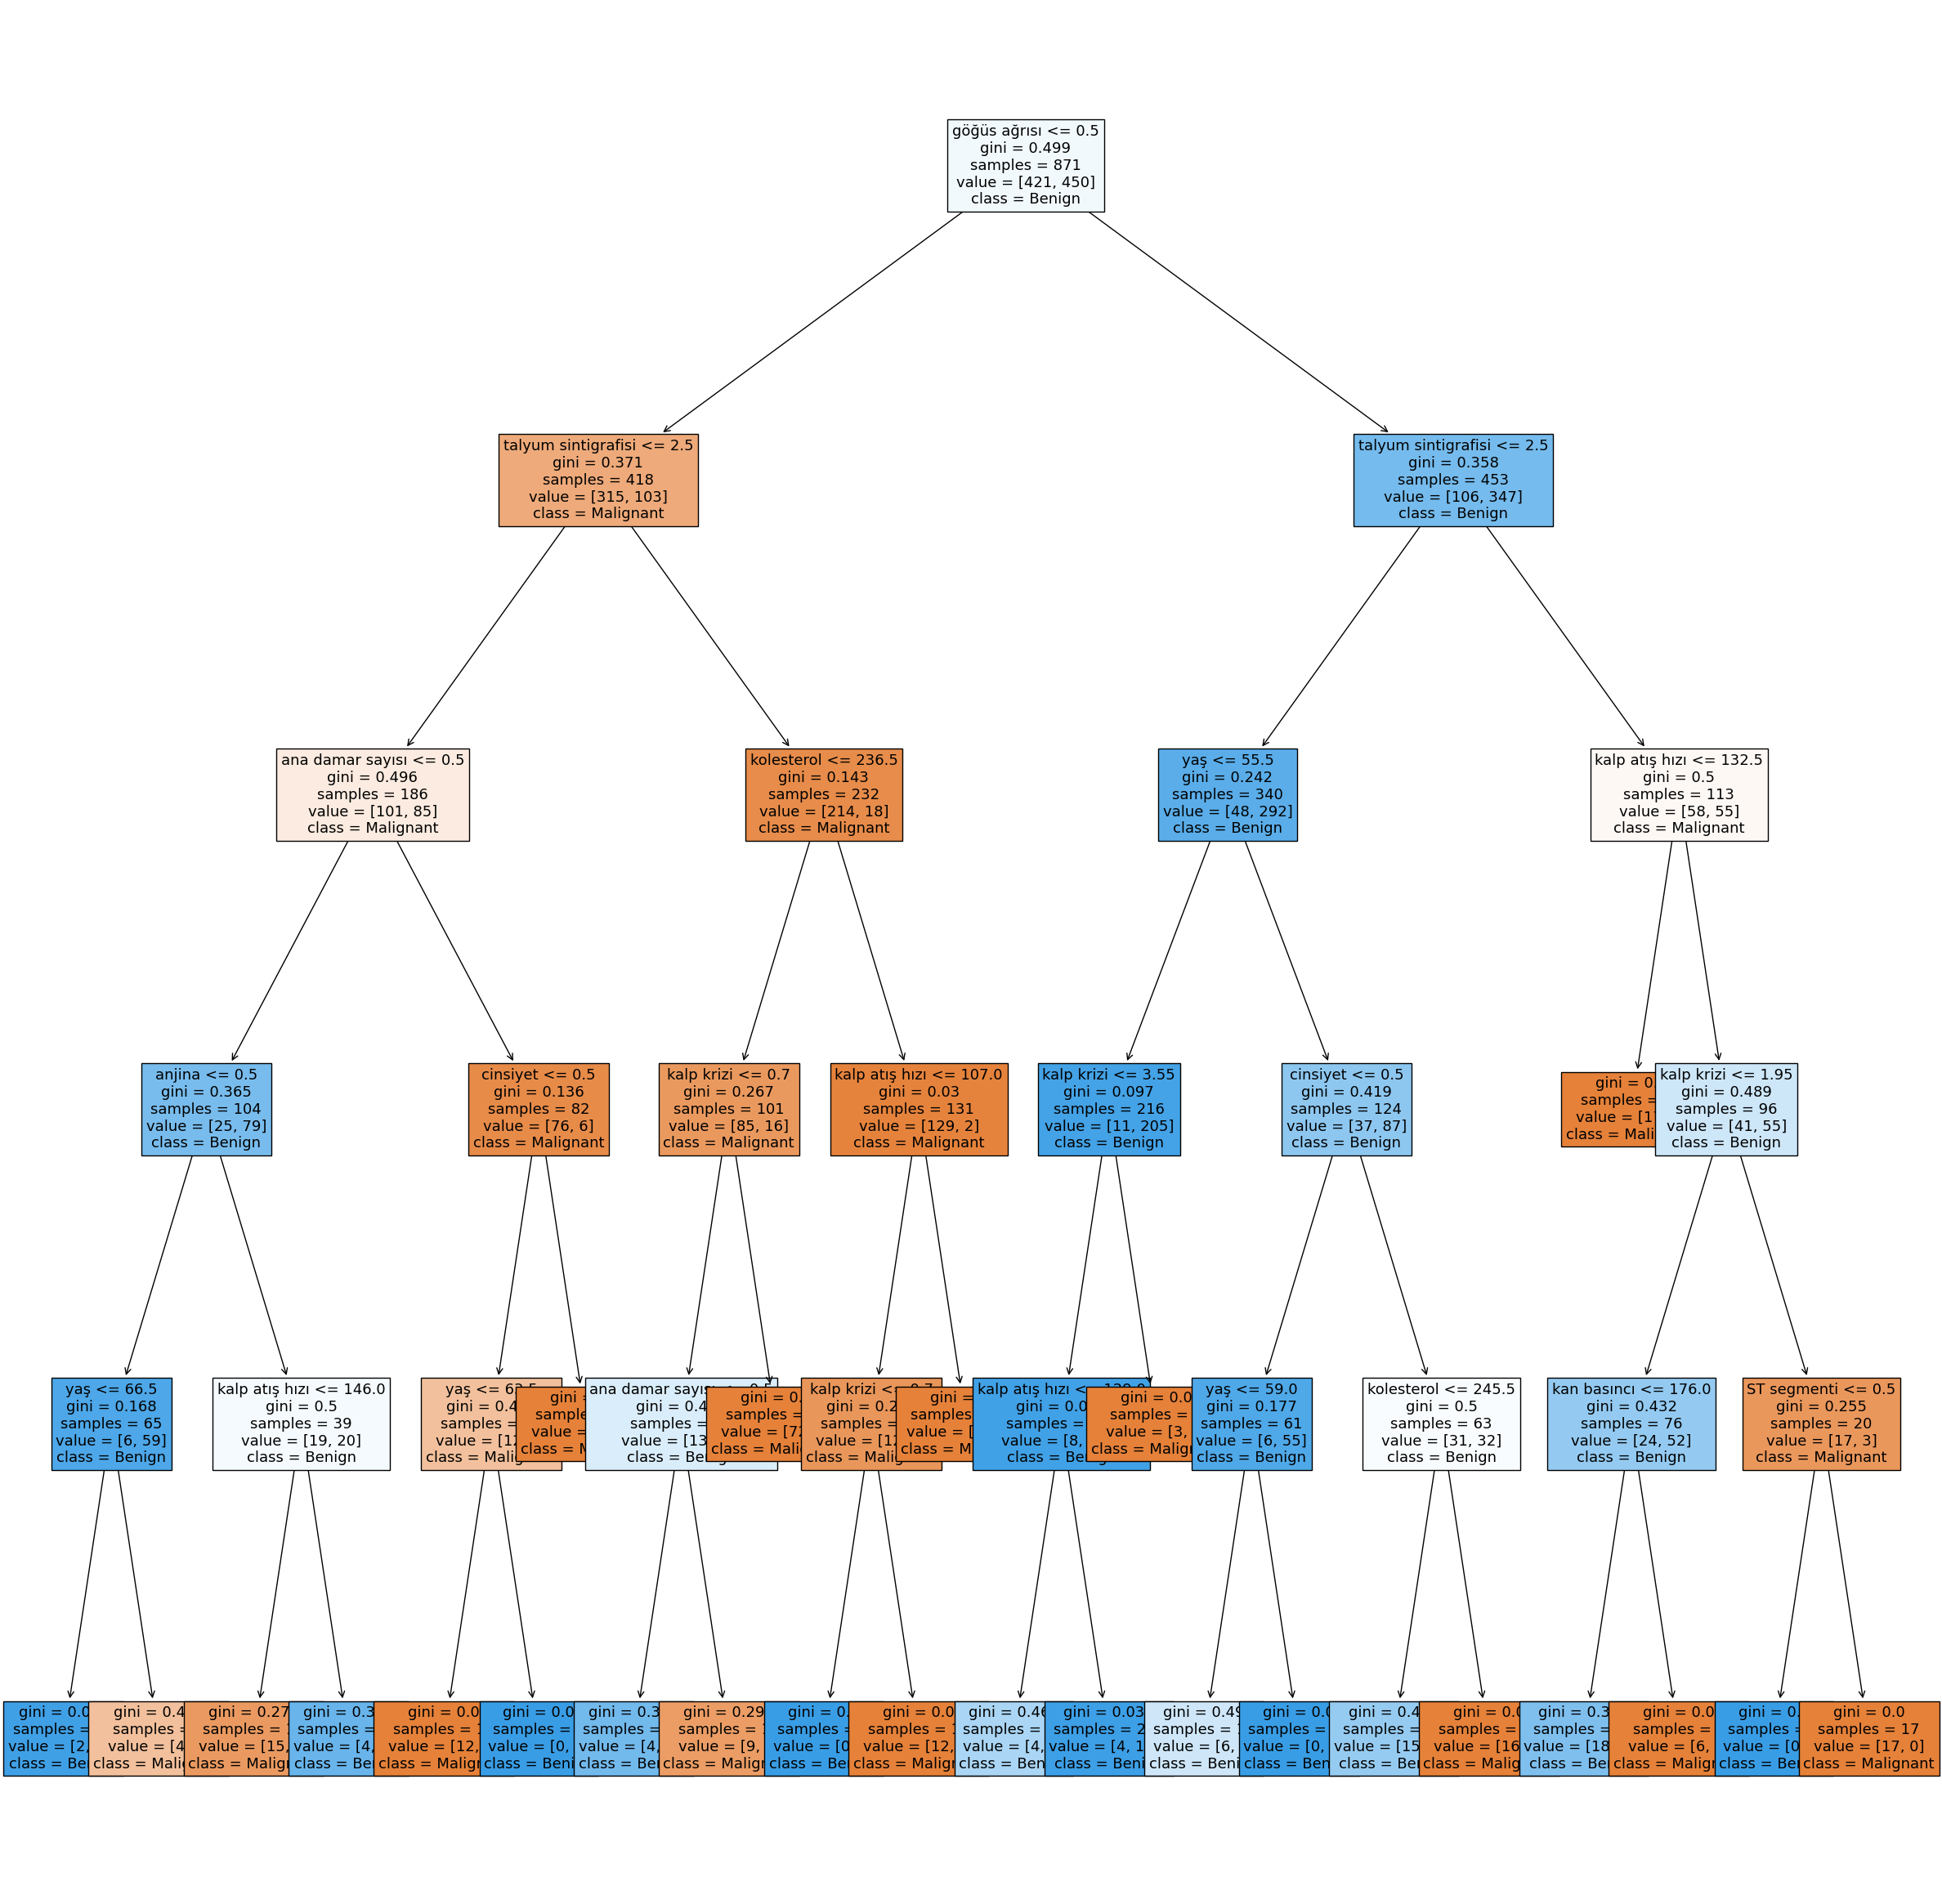

In [22]:
fig = plt.figure(figsize=(30,30))
_ = tree.plot_tree(dt,
                  feature_names=feature_names,
                  class_names={0:'Malignant', 1:'Benign'},
                  filled=True,
                  fontsize=13)